# Can you predict the success of restaurant?

## 📖 Background

Bangalore officially known as Bengaluru is the capital and the largest city of the Indian state of Karnataka. It has a population of more than 8 million and a metropolitan population of around 11 million, making it the third most populous city and fifth most populous urban agglomeration in India.Located in southern India on the Deccan Plateau, at a height of over 900 m (3,000 ft) above sea level, Bangalore is known for its pleasant climate throughout the year. Its elevation is the highest among the major cities of India. Bangalore is widely regarded as the "Silicon Valley of India" (or "IT capital of India") because of its role as the nation's leading information technology (IT) exporter.Indian technological organisations are headquartered in the city. A demographically diverse city, Bangalore is the second fastest-growing major metropolis in India.

Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Pankaj Chaddah and Deepinder Goyal in 2008.Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.As of 2019, the service is available in 24 countries and in more than 10,000 cities.

# data
- url : This feature contains the url of the restaurant on the Zomato website
- address : This feature contains the address of the restaurant in Bangalore
- name : This feature contains the name of the restaurant
- online_order : whether online ordering is available in the restaurant or not
- book_table : table book option available or not
- rate : contains the overall rating of the restaurant out of 5
- votes : contains total number of upvotes for the restaurant
- phone : contains the phone number of the restaurant
- location : contains the neighborhood in which the restaurant is located
- rest_type : restaurant type
- dish_liked : dishes people liked in the restaurant
- cuisines : food styles, separated by comma
- approx_cost(for two people) : contains the approximate cost of meal for two people
- reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by thecustomer
- menu_item : contains list of menus available in the restaurant
- listed_in(type) : type of meal
- listed_in(city) : contains the neighborhood in which the restaurant is located

### Steps :
-             Importing the Essential Libraries
-             Loading the Data
-             Exploratory Data 
-             preprocessing on the data (Checking and Handling Missing Values , Duplicates and outliers)
-             Visualization
-             prepare the data for modeling (Label encoding and Separate the data)
-             Building Models & Model Selection
-             Testing on real data & saving model for deployment

# importing libraries

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1)

# loading data

In [2]:
# load the data 
df = pd.read_csv('zomato.csv')

# Explore data 

In [3]:
#show the first 5 rows in dataframe 
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
## Show information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# number of nulls
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
# drop columns that will not use in this case
df.drop(['url','address','phone','menu_item','votes','name','reviews_list'],axis=1,inplace=True)

In [7]:
# function that shows unique values of column 
def ShowDetais() : 
    global df
    for col in df.columns : 
        print(f' for feature {col}')
        print(f'Number of Unique Values {len(df[col].unique())}')
        print(f' Random Value {df[col][np.random.randint(df.shape[0])]}')
        print(f' Random Value {df[col][np.random.randint(df.shape[0])]}')
        print(f' Random Value {df[col][np.random.randint(df.shape[0])]}')
        print('-------------------------------------------------------')

In [8]:
ShowDetais()

 for feature online_order
Number of Unique Values 2
 Random Value No
 Random Value No
 Random Value Yes
-------------------------------------------------------
 for feature book_table
Number of Unique Values 2
 Random Value No
 Random Value Yes
 Random Value No
-------------------------------------------------------
 for feature rate
Number of Unique Values 65
 Random Value 3.7 /5
 Random Value 3.3 /5
 Random Value 4.2 /5
-------------------------------------------------------
 for feature location
Number of Unique Values 94
 Random Value Richmond Road
 Random Value Frazer Town
 Random Value Richmond Road
-------------------------------------------------------
 for feature rest_type
Number of Unique Values 94
 Random Value Cafe
 Random Value Quick Bites, Dessert Parlor
 Random Value Quick Bites
-------------------------------------------------------
 for feature dish_liked
Number of Unique Values 5272
 Random Value nan
 Random Value Fish Curry, Roast Chicken, Kerala Parotta, Appam, Mut

In [9]:
df.columns

Index(['online_order', 'book_table', 'rate', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# preprocessing

In [10]:
## Show the most frequent dish liked 
df['dish_liked'].isna().sum()

28078

In [11]:
### Impute null values of by put noliked instead of it
df['dish_liked'].fillna('noliked',inplace=True)

In [12]:
### making function to Calculates the number of dish liked and put in new column 
def Calculates_no_of_dish_liked(x):
    if x == 'noliked':
        return 0
    else:
        return len(x.split(','))
df['DishLikedCount'] = df['dish_liked'].apply(Calculates_no_of_dish_liked)

In [13]:
### dic that contains the best dish liked and calculates the no

Most_Liked_dishes = {}

for i in df['dish_liked'].tolist():
    for j in i.split(','):
        if j in Most_Liked_dishes.keys() :
            Most_Liked_dishes[j] +=1
        else  :
                Most_Liked_dishes[j] =1

Most_Liked_dishes=  {k:v for k,v in sorted(
    Most_Liked_dishes.items(),key = lambda
    item: item[1],reverse = True) }
Most_Liked_dishes

{'noliked': 28078,
 ' Pasta': 2737,
 ' Pizza': 1970,
 ' Cocktails': 1922,
 ' Burgers': 1766,
 ' Mocktails': 1645,
 ' Biryani': 1326,
 ' Sandwiches': 1296,
 'Burgers': 1258,
 ' Nachos': 1211,
 ' Coffee': 1189,
 ' Fish': 1156,
 ' Paratha': 1126,
 ' Salads': 1059,
 ' Chicken Biryani': 1019,
 'Cocktails': 910,
 ' Noodles': 896,
 ' Fries': 889,
 ' Beer': 858,
 ' Mutton Biryani': 841,
 ' Tea': 822,
 'Coffee': 805,
 ' Sandwich': 794,
 ' Butter Chicken': 794,
 ' Thali': 777,
 'Pizza': 767,
 'Biryani': 766,
 ' Brownie': 748,
 ' Roti': 743,
 ' Salad': 685,
 ' Hot Chocolate': 673,
 'Pasta': 672,
 ' Momos': 669,
 ' Chicken Curry': 646,
 ' Dal Makhani': 644,
 ' Chaat': 626,
 ' Tandoori Chicken': 607,
 ' Waffles': 593,
 ' Sea Food': 578,
 ' Tiramisu': 567,
 ' Lassi': 561,
 ' Rolls': 550,
 ' Vegetable Biryani': 548,
 'Noodles': 519,
 ' French Fries': 505,
 ' Chilli Chicken': 500,
 ' Paneer Tikka': 483,
 ' Gulab Jamun': 483,
 ' Cheesecake': 475,
 ' Raita': 475,
 'Rolls': 441,
 'Paratha': 440,
 ' Pav B

In [14]:
# Select the best dish liked
ImportantDishes = [
 ' Pasta',
 ' Pizza',
 ' Cocktails',
 ' Burgers',
 ' Mocktails',
 ' Biryani',
 ' Sandwiches',
 'Burgers',
 ' Nachos',
 ' Coffee',
 ' Fish',
 ' Paratha',
 ' Salads',
 ' Chicken Biryani']

In [15]:
# makeing feature extraction on dish_liked column (select best dish_lisked)
for dish in ImportantDishes : 
    df[f'dish_liked : {dish}'] = df['dish_liked'].apply(lambda x : 1 if dish in x.split(',') else 0)
    
# drop dish_liked columns after feature extraction    
df.drop('dish_liked',axis=1,inplace=True)    

In [16]:
#checking rest_type null values
df['rest_type'].isna().sum()

227

In [17]:
# drop nulls of rest type

Wrongindices = list(df[df['rest_type'].isna()].index)
len(Wrongindices)
df.drop(Wrongindices,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.shape

(51490, 24)

In [18]:
# function that calculates number of rest type (feature extraction)
def calculates_number_of_rest_type(x):
    return len(x.split(','))
df['Number_rest_type'] = df['rest_type'].apply(calculates_number_of_rest_type)

In [19]:
# compare the new feature with old feature
df[['rest_type','Number_rest_type']].head(5)

,rest_type,Number_rest_type
0,Casual Dining,1
1,Casual Dining,1
2,"Cafe, Casual Dining",2
3,Quick Bites,1
4,Casual Dining,1


In [20]:
# show number of frquent rest_type
df['Number_rest_type'].value_counts()

1    43763
2     7727
Name: Number_rest_type, dtype: int64

In [21]:
# show count of each rest_type 

Most_rest_type = {}

for i in df['rest_type'].tolist():
    for j in i.split(', '):
        if j in Most_rest_type.keys() :
            Most_rest_type[j] +=1
        else  :
                Most_rest_type[j] =1

Most_rest_type=  {k:v for k,v in sorted(
    Most_rest_type.items(),key = lambda
    item: item[1],reverse = True) }
Most_rest_type

{'Quick Bites': 20639,
 'Casual Dining': 13057,
 'Cafe': 5074,
 'Delivery': 4641,
 'Dessert Parlor': 3211,
 'Bar': 2457,
 'Takeaway': 2157,
 'Bakery': 1998,
 'Beverage Shop': 1471,
 'Pub': 950,
 'Food Court': 765,
 'Sweet Shop': 745,
 'Lounge': 555,
 'Fine Dining': 405,
 'Microbrewery': 390,
 'Mess': 274,
 'Kiosk': 192,
 'Food Truck': 84,
 'Confectionery': 47,
 'Club': 41,
 'Dhaba': 40,
 'Irani Cafee': 15,
 'Meat Shop': 4,
 'Bhojanalya': 3,
 'Pop Up': 2}

In [22]:
#select best of rest_types

Importantrest_type =['Quick Bites',
 'Casual Dining',
 'Cafe',
 'Delivery',
 'Dessert Parlor',
 'Bar',
 'Takeaway',
 'Bakery',
 'Beverage Shop',
 'Pub']
#put onther features in other column to reduce number of columns
other=['Food Court',
    'Sweet Shop',
    'Lounge',
    'Fine Dining',
    'Microbrewery',
    'Mess',
    'Kiosk',
    'Food Truck',
    'Confectionery',
    'Club',
    'Dhaba',
    'Irani Cafee',
    'Meat Shop',
    'Bhojanalya',
    'Pop Up']

In [23]:
#making new feature from rest_type
for rest_type in Importantrest_type : 
    df[f'rest_type : {rest_type}'] = df['rest_type'].apply(lambda x : 1 if rest_type in x.split(',') else 0)
    
def filter_rest_type(value):
    for word in other:
        if word in str(value.split(',')):
            return 1
        else:
            return 0
df['rest_type:other']=df["rest_type"].apply(filter_rest_type)    

In [24]:
# show count of rest type
df['rest_type:other'].value_counts()

0    50725
1      765
Name: rest_type:other, dtype: int64

In [25]:
#compare between features
df[(df['rest_type:other'] == 1) & (df['Number_rest_type'] ==2)].head()

,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),DishLikedCount,dish_liked : Pasta,dish_liked : Pizza,dish_liked : Cocktails,dish_liked : Burgers,dish_liked : Mocktails,dish_liked : Biryani,dish_liked : Sandwiches,dish_liked : Burgers,dish_liked : Nachos,dish_liked : Coffee,dish_liked : Fish,dish_liked : Paratha,dish_liked : Salads,dish_liked : Chicken Biryani,Number_rest_type,rest_type : Quick Bites,rest_type : Casual Dining,rest_type : Cafe,rest_type : Delivery,rest_type : Dessert Parlor,rest_type : Bar,rest_type : Takeaway,rest_type : Bakery,rest_type : Beverage Shop,rest_type : Pub,rest_type:other
1261,Yes,No,3.0/5,Bannerghatta Road,"Food Court, Quick Bites","Mexican, Tex-Mex",400,Delivery,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
1848,No,No,3.4/5,Bannerghatta Road,"Food Court, Dessert Parlor","Desserts, Beverages",250,Desserts,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
2113,Yes,No,3.0/5,Bannerghatta Road,"Food Court, Quick Bites","Mexican, Tex-Mex",400,Dine-out,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
2148,No,No,3.4/5,Bannerghatta Road,"Food Court, Casual Dining","North Indian, Biryani",600,Dine-out,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
3767,No,No,3.9/5,Bellandur,"Cafe, Food Court","Cafe, Desserts",700,Cafes,Bellandur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1


In [26]:
df.columns

Index(['online_order', 'book_table', 'rate', 'location', 'rest_type',
       'cuisines', 'approx_cost(for two people)', 'listed_in(type)',
       'listed_in(city)', 'DishLikedCount', 'dish_liked :  Pasta',
       'dish_liked :  Pizza', 'dish_liked :  Cocktails',
       'dish_liked :  Burgers', 'dish_liked :  Mocktails',
       'dish_liked :  Biryani', 'dish_liked :  Sandwiches',
       'dish_liked : Burgers', 'dish_liked :  Nachos', 'dish_liked :  Coffee',
       'dish_liked :  Fish', 'dish_liked :  Paratha', 'dish_liked :  Salads',
       'dish_liked :  Chicken Biryani', 'Number_rest_type',
       'rest_type : Quick Bites', 'rest_type : Casual Dining',
       'rest_type : Cafe', 'rest_type : Delivery',
       'rest_type : Dessert Parlor', 'rest_type : Bar', 'rest_type : Takeaway',
       'rest_type : Bakery', 'rest_type : Beverage Shop', 'rest_type : Pub',
       'rest_type:other'],
      dtype='object')

In [27]:
### checking nulls
df['cuisines'].isna().sum()

24

In [28]:
### drop nulls of cuisines
Wrongindices = list(df[df['cuisines'].isna()].index)
len(Wrongindices)
df.drop(Wrongindices,axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)
df.shape

(51466, 36)

In [29]:
### makeing new column that contains number of cuisines
df['NumberOFcuisines'] = df['cuisines'].apply(lambda x :len(x.split(',')))

In [30]:
### compare between features
df[['cuisines','NumberOFcuisines']].head()

,cuisines,NumberOFcuisines
0,"North Indian, Mughlai, Chinese",3
1,"Chinese, North Indian, Thai",3
2,"Cafe, Mexican, Italian",3
3,"South Indian, North Indian",2
4,"North Indian, Rajasthani",2


In [31]:
df.head()

,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),DishLikedCount,dish_liked : Pasta,dish_liked : Pizza,dish_liked : Cocktails,dish_liked : Burgers,dish_liked : Mocktails,dish_liked : Biryani,dish_liked : Sandwiches,dish_liked : Burgers,dish_liked : Nachos,dish_liked : Coffee,dish_liked : Fish,dish_liked : Paratha,dish_liked : Salads,dish_liked : Chicken Biryani,Number_rest_type,rest_type : Quick Bites,rest_type : Casual Dining,rest_type : Cafe,rest_type : Delivery,rest_type : Dessert Parlor,rest_type : Bar,rest_type : Takeaway,rest_type : Bakery,rest_type : Beverage Shop,rest_type : Pub,rest_type:other,NumberOFcuisines
0,Yes,Yes,4.1/5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3
1,Yes,No,4.1/5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,3
2,Yes,No,3.8/5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,3
3,No,No,3.7/5,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2
4,No,No,3.8/5,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2


In [32]:
### show the best cusinise that frequent

BestCuisines = {}

for i in df['cuisines'].tolist():
    for j in i.split(', '):
        if j in BestCuisines.keys() :
            BestCuisines[j] +=1
        else  :
                BestCuisines[j] =1

BestCuisines=  {k:v for k,v in sorted(
    BestCuisines.items(),key = lambda
    item: item[1],reverse = True) }
BestCuisines

{'North Indian': 20961,
 'Chinese': 15462,
 'South Indian': 8626,
 'Fast Food': 8065,
 'Biryani': 6444,
 'Continental': 5760,
 'Desserts': 5620,
 'Cafe': 5303,
 'Beverages': 4732,
 'Italian': 3378,
 'Bakery': 2834,
 'Street Food': 2578,
 'Pizza': 2067,
 'Burger': 2007,
 'Seafood': 1801,
 'Ice Cream': 1774,
 'Andhra': 1753,
 'Mughlai': 1553,
 'Rolls': 1463,
 'American': 1461,
 'Kerala': 1450,
 'Asian': 1292,
 'Momos': 1269,
 'Finger Food': 1213,
 'Juices': 1140,
 'Salad': 1138,
 'Arabian': 1090,
 'Kebab': 1029,
 'Mithai': 1018,
 'Thai': 997,
 'Healthy Food': 917,
 'Sandwich': 871,
 'BBQ': 736,
 'European': 715,
 'Mangalorean': 688,
 'Steak': 573,
 'Bengali': 573,
 'Mediterranean': 555,
 'Mexican': 539,
 'Tea': 395,
 'Japanese': 349,
 'Tibetan': 349,
 'Hyderabadi': 330,
 'Chettinad': 206,
 'Rajasthani': 183,
 'Lebanese': 175,
 'Vietnamese': 169,
 'Modern Indian': 155,
 'Korean': 143,
 'Maharashtrian': 139,
 'Coffee': 138,
 'Oriya': 135,
 'Goan': 114,
 'Middle Eastern': 106,
 'Malaysian':

In [33]:
# select best Cuisines
ImportantCuisines = ['North Indian',
 'Chinese',
 'South Indian',
 'Fast Food',
 'Biryani',
 'Continental',
 'Desserts',
 'Cafe',
 'Beverages',
 'Italian',
 'Bakery',
 'Street Food',
 'Pizza',
 'Burger',
 'Seafood',
 'Ice Cream',
 'Andhra',
 'Mughlai',
 'Rolls',
 'American',
 'Kerala',
 'Asian',
 'Momos',
 'Finger Food',
 'Juices',
 'Salad',
 'Arabian',
 'Kebab',
 'Mithai',
 'Thai']



other = ['Healthy Food',
 'Sandwich',
 'BBQ',
 'European',
 'Mangalorean',
 'Steak',
 'Bengali',
 'Mediterranean' ,
 'Mexican' ,
 'Tea' ,
 'Japanese' ,
 'Tibetan' ,
 'Hyderabadi' ,
 'Chettinad' ,
 'Rajasthani' ,
 'Lebanese' ,
 'Vietnamese' ,
 'Modern Indian' ,
 'Korean' ,
 'Maharashtrian' ,
 'Coffee' ,
 'Oriya' ,
 'Goan' ,
 'Middle Eastern' ,
 'Malaysian',
 'Gujarati',
 'Indonesian',
 'Bihari',
 'Charcoal Chicken',
 'French',
 'Nepalese',
 'Turkish',
 'Konkan',
 'Afghan',
 'North Eastern',
 'Wraps',
 'Lucknowi',
 'Burmese',
 'Tex-Mex',
 'Singaporean',
 'Spanish',
 'Sushi',
 'Bar Food',
 'Greek',
 'Kashmiri',
 'Iranian',
 'Awadhi',
 'Assamese',
 'Naga',
 'Grill',
 'Parsi',
 'Roast Chicken',
 'South American',
 'African',
 'Sri Lankan',
 'Mongolian',
 'Paan',
 'Drinks Only',
 'Portuguese',
 'Bubble Tea',
 'Afghani',
 'Tamil',
 'British',
 'German',
 'Bohri',
 'Cantonese',
 'Russian',
 'Jewish',
 'Vegan',
 'Australian',
 'Belgian',
 'Raw Meats',
 'Sindhi',
 'Hot dogs',
 'Pan Asian',
 'Indian',
 'Malwani']

In [34]:
#making new feature extraction from cuisines column
for Word in ImportantCuisines : 
    df[f'cuisines_type: {Word}'] = df['cuisines'].apply(lambda x : 1 if Word in x.split(', ') else 0)
    
    
    
    
def filter_cuisines_type(value):
    for word in other:
        if word in str(value.split(',')):
            return 1
        else:
            return 0
df['cuisines_type:other']=df["cuisines"].apply(filter_cuisines_type)    

In [35]:
df['cuisines_type:other'].value_counts()

0    50549
1      917
Name: cuisines_type:other, dtype: int64

In [36]:
#compare between old and new feature
df[(df['cuisines_type:other'] == 1) & (df['NumberOFcuisines'] ==3)].head()

,online_order,book_table,rate,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),DishLikedCount,dish_liked : Pasta,dish_liked : Pizza,dish_liked : Cocktails,dish_liked : Burgers,dish_liked : Mocktails,dish_liked : Biryani,dish_liked : Sandwiches,dish_liked : Burgers,dish_liked : Nachos,dish_liked : Coffee,dish_liked : Fish,dish_liked : Paratha,dish_liked : Salads,dish_liked : Chicken Biryani,Number_rest_type,rest_type : Quick Bites,rest_type : Casual Dining,rest_type : Cafe,rest_type : Delivery,rest_type : Dessert Parlor,rest_type : Bar,rest_type : Takeaway,rest_type : Bakery,rest_type : Beverage Shop,rest_type : Pub,rest_type:other,NumberOFcuisines,cuisines_type: North Indian,cuisines_type: Chinese,cuisines_type: South Indian,cuisines_type: Fast Food,cuisines_type: Biryani,cuisines_type: Continental,cuisines_type: Desserts,cuisines_type: Cafe,cuisines_type: Beverages,cuisines_type: Italian,cuisines_type: Bakery,cuisines_type: Street Food,cuisines_type: Pizza,cuisines_type: Burger,cuisines_type: Seafood,cuisines_type: Ice Cream,cuisines_type: Andhra,cuisines_type: Mughlai,cuisines_type: Rolls,cuisines_type: American,cuisines_type: Kerala,cuisines_type: Asian,cuisines_type: Momos,cuisines_type: Finger Food,cuisines_type: Juices,cuisines_type: Salad,cuisines_type: Arabian,cuisines_type: Kebab,cuisines_type: Mithai,cuisines_type: Thai,cuisines_type:other
141,No,No,NaN,Banashankari,"Quick Bites, Beverage Shop","Healthy Food, Juices, Sandwich",350,Delivery,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
437,Yes,No,3.6/5,JP Nagar,"Takeaway, Delivery","Healthy Food, North Indian, Thai",500,Delivery,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
746,No,No,NaN,Banashankari,"Quick Bites, Beverage Shop","Healthy Food, Juices, Sandwich",350,Dine-out,Banashankari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
915,No,No,NaN,JP Nagar,Quick Bites,"Healthy Food, Beverages, Cafe",300,Cafes,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1329,Yes,No,3.6/5,JP Nagar,Beverage Shop,"Beverages, Juices, Healthy Food",250,Delivery,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [37]:
df.shape

(51466, 68)

In [38]:
# feature extraction from location column (select columns that < 300)

location=df["location"].value_counts(ascending=False)
location_lessthan300=location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df["location"]=df["location"].apply(handle_location)
df["location"].value_counts()

BTM                      5097
others                   4686
HSR                      2511
Koramangala 5th Block    2504
JP Nagar                 2222
Whitefield               2120
Indiranagar              2076
Jayanagar                1924
Marathahalli             1825
Bannerghatta Road        1624
Bellandur                1271
Electronic City          1249
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1141
Sarjapur Road            1057
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              904
Kalyan Nagar              844
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Brookefield               658
Banaswadi                 656
New BEL Road              646
Kammanahalli              643
Rajajinagar               591
Church Street             569
Lavelle Ro

In [39]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [40]:
# cheaking unique values in rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [41]:
### making function that hundeling rate column

def handelrate(value):
    if(value=="NEW" or value=="-"):
        return np.nan
    else:
        value=str(value).split("/")
        value=value[0]
        return float(value)
df['rate']=df['rate'].apply(handelrate)

In [42]:
df['rate'].isna().sum()

9961

In [43]:
#impute all nulls by mean
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [44]:
# classify rate
df['rate'] = df['rate'].apply(lambda x :  1 if x >= 3.5 else 0)

In [45]:
df['rate'].value_counts()*100/df.shape[0]

1    77.843625
0    22.156375
Name: rate, dtype: float64

In [46]:
#drop null values of column approx_cost(for two people) and change type to numeric
df.dropna(axis=0 , inplace=True)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('int64')

In [47]:
df.shape

(51148, 68)

# Data visualization

In [48]:
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(12,8))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     

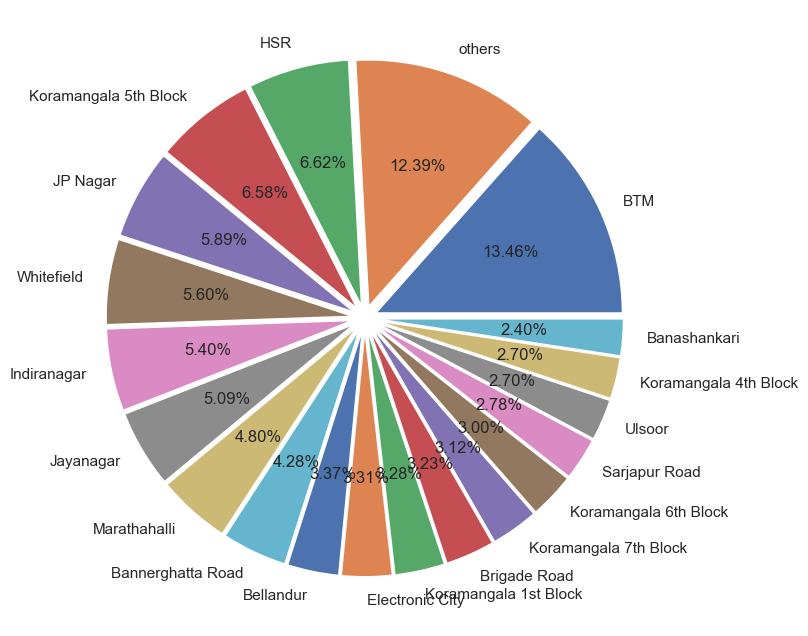

In [49]:
Pie(df,'location')

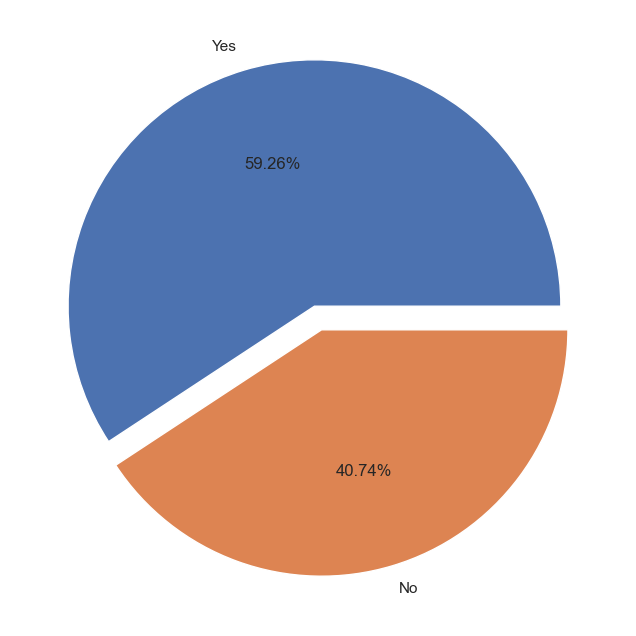

In [50]:
Pie(df,'online_order')

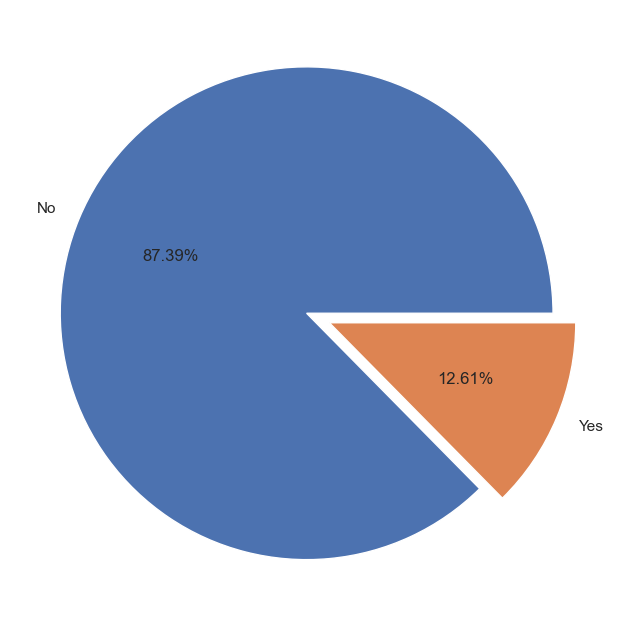

In [51]:
Pie(df,'book_table')

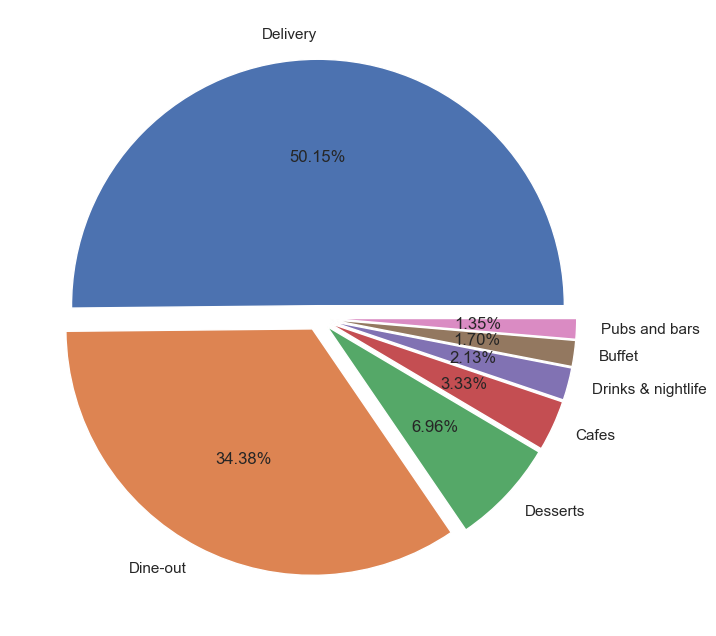

In [52]:
Pie(df,'listed_in(type)')

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

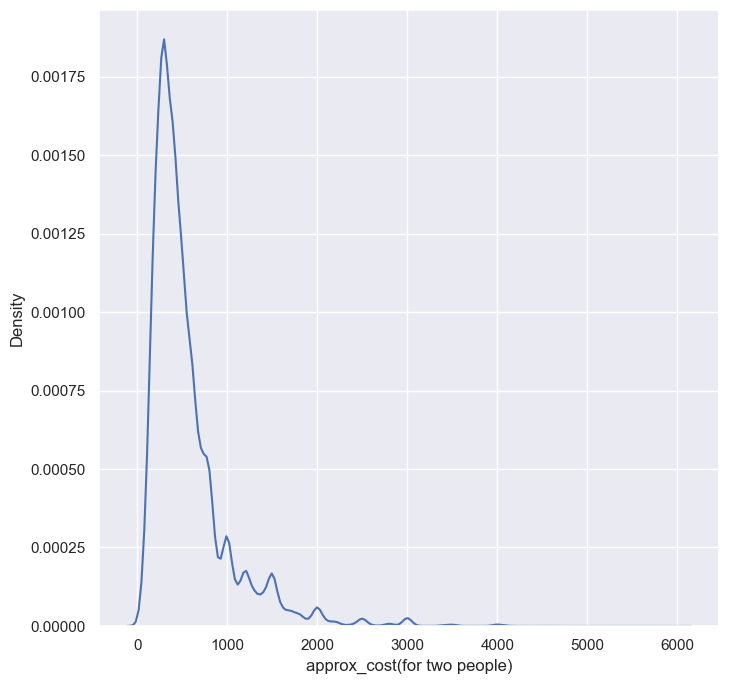

In [53]:
sns.kdeplot(data=df,x='approx_cost(for two people)')

<AxesSubplot:xlabel='approx_cost(for two people)'>

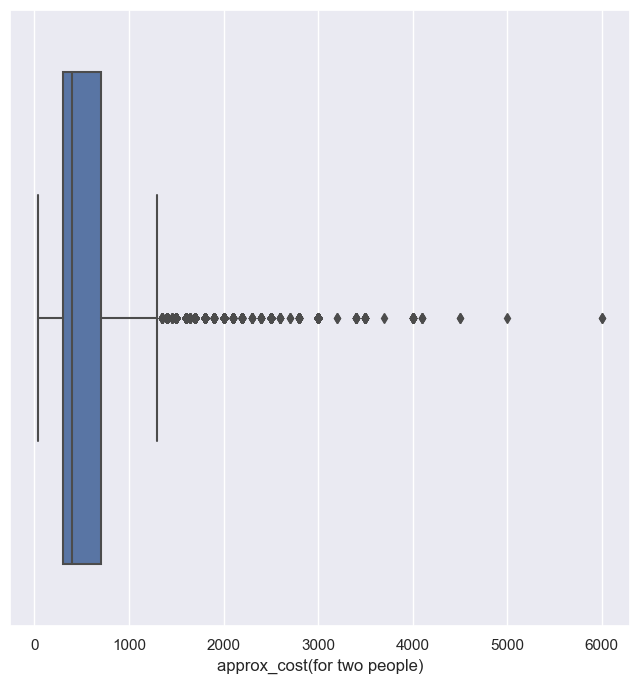

In [54]:
sns.boxplot(data=df,x='approx_cost(for two people)')

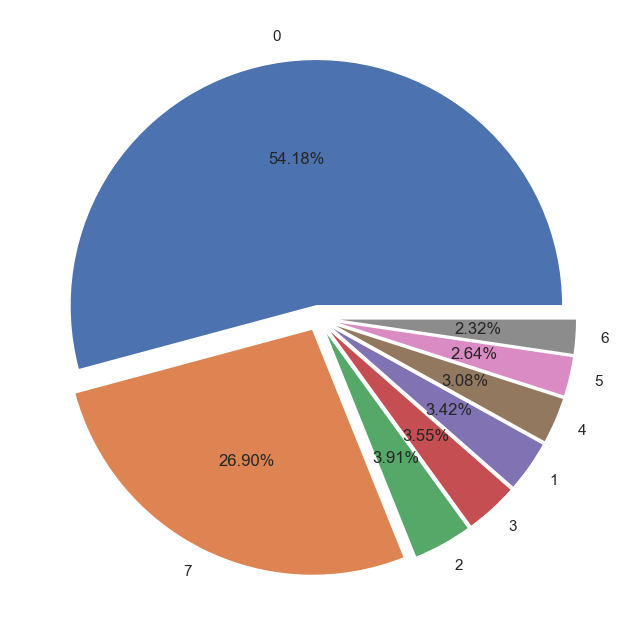

In [55]:
Pie(df,'DishLikedCount')

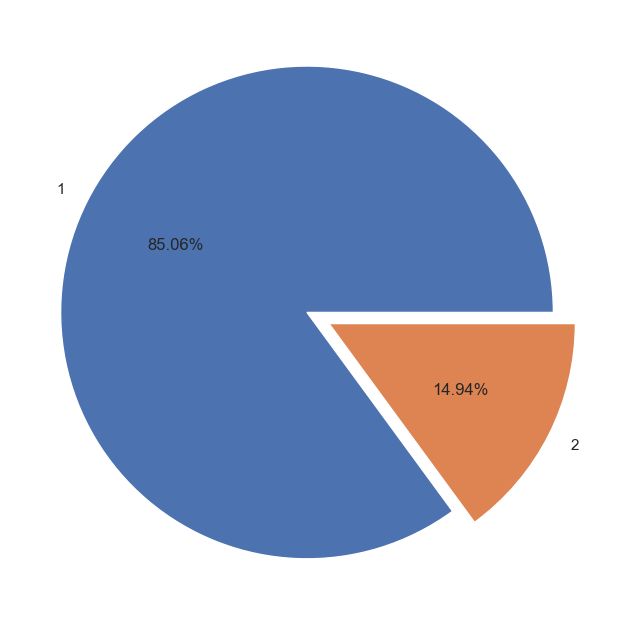

In [56]:
Pie(df,'Number_rest_type')

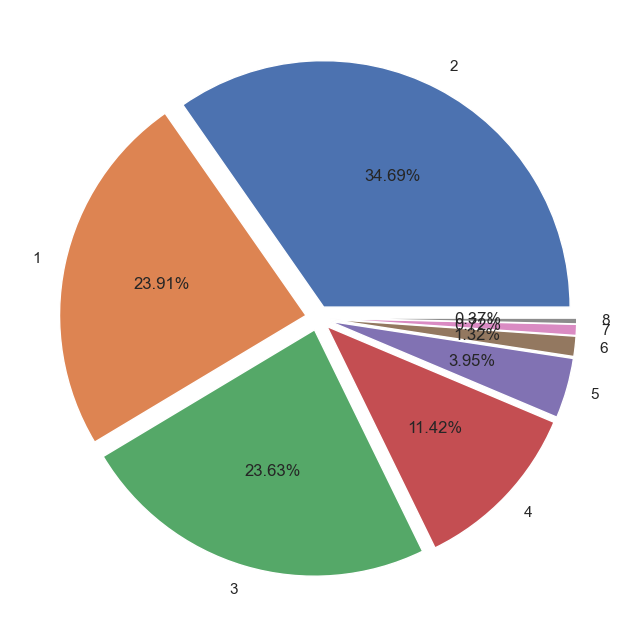

In [57]:
Pie(df,'NumberOFcuisines')

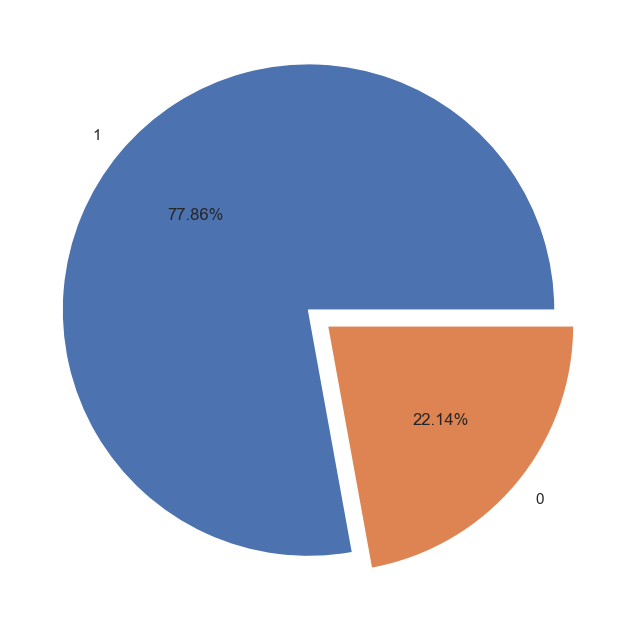

In [58]:
Pie(df,'rate')

In [59]:
restFeaturesList = [c for c in df.columns if 'rest_type' in c]
restFeaturesList.remove('rest_type')
restFeaturesList.remove('Number_rest_type')
restFeaturesList

['rest_type : Quick Bites',
 'rest_type : Casual Dining',
 'rest_type : Cafe',
 'rest_type : Delivery',
 'rest_type : Dessert Parlor',
 'rest_type : Bar',
 'rest_type : Takeaway',
 'rest_type : Bakery',
 'rest_type : Beverage Shop',
 'rest_type : Pub',
 'rest_type:other']

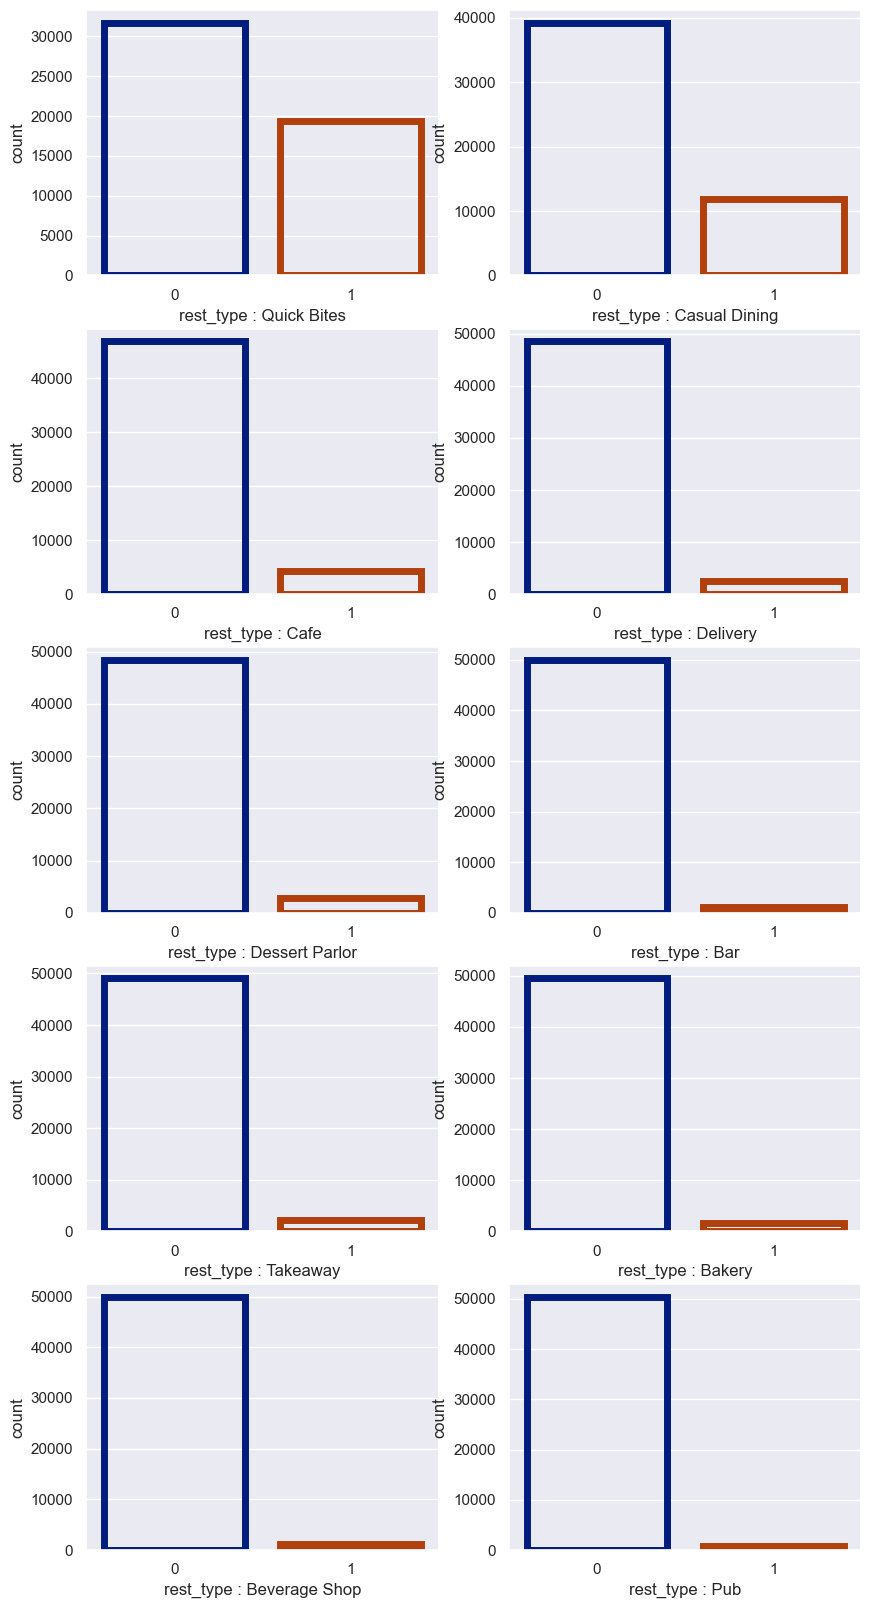

In [60]:
fig, ax = plt.subplots(figsize=(10,20))
for N in range(10) : 
    N+=1
    plt.subplot(5,2,N)
    sns.countplot(x=restFeaturesList[N-1], data=df,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

In [61]:
WordExistNumbers = list(df[restFeaturesList].sum().values)
WordExistRatios = [np.round(100*i/df.shape[0],2) for i in WordExistNumbers]
WordExistNumbers,WordExistRatios

([19435, 11931, 4319, 2578, 2726, 1134, 2130, 1680, 1265, 776, 760],
 [38.0, 23.33, 8.44, 5.04, 5.33, 2.22, 4.16, 3.28, 2.47, 1.52, 1.49])

In [62]:
ThisData = pd.DataFrame([WordExistRatios,restFeaturesList],index =['Percentage','rest_type']).T
ThisData

,Percentage,rest_type
0,38.0,rest_type : Quick Bites
1,23.33,rest_type : Casual Dining
2,8.44,rest_type : Cafe
3,5.04,rest_type : Delivery
4,5.33,rest_type : Dessert Parlor
5,2.22,rest_type : Bar
6,4.16,rest_type : Takeaway
7,3.28,rest_type : Bakery
8,2.47,rest_type : Beverage Shop
9,1.52,rest_type : Pub


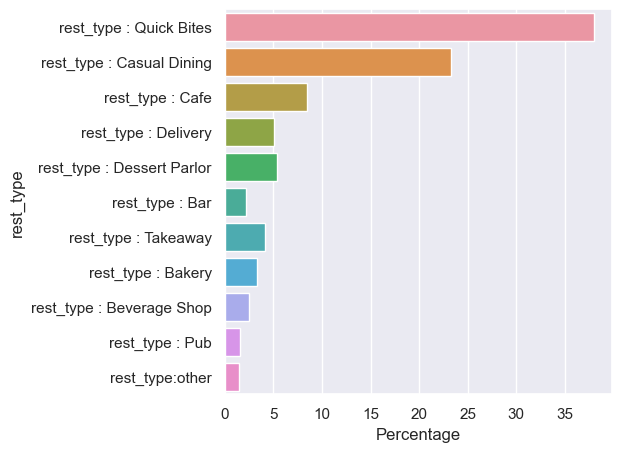

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x="Percentage", y="rest_type", data=ThisData)

In [64]:
dishlikedFeaturesList = [c for c in df.columns if 'dish_liked ' in c]
dishlikedFeaturesList

['dish_liked :  Pasta',
 'dish_liked :  Pizza',
 'dish_liked :  Cocktails',
 'dish_liked :  Burgers',
 'dish_liked :  Mocktails',
 'dish_liked :  Biryani',
 'dish_liked :  Sandwiches',
 'dish_liked : Burgers',
 'dish_liked :  Nachos',
 'dish_liked :  Coffee',
 'dish_liked :  Fish',
 'dish_liked :  Paratha',
 'dish_liked :  Salads',
 'dish_liked :  Chicken Biryani']

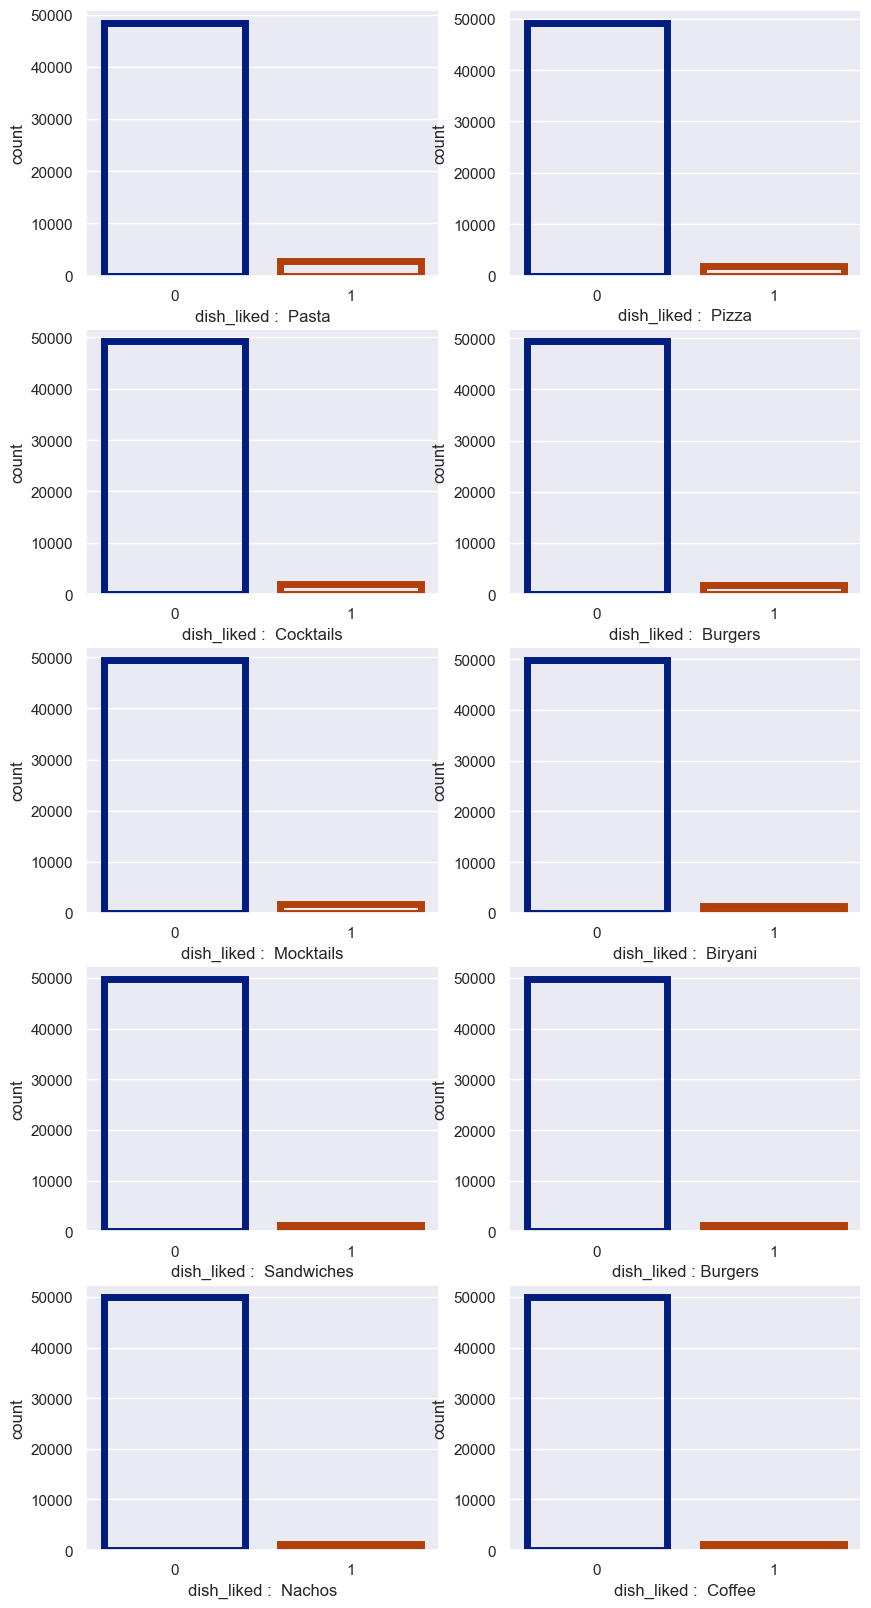

In [65]:
fig, ax = plt.subplots(figsize=(10,20))
for N in range(10) : 
    N+=1
    plt.subplot(5,2,N)
    sns.countplot(x=dishlikedFeaturesList[N-1], data=df,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

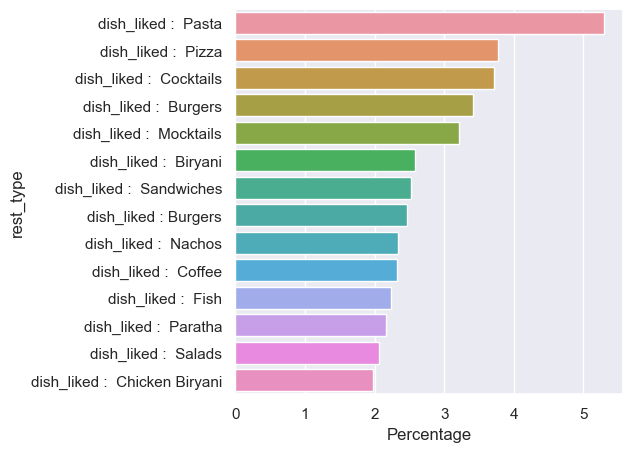

In [66]:
WordExistNumbers = list(df[dishlikedFeaturesList].sum().values)
WordExistRatios = [np.round(100*i/df.shape[0],2) for i in WordExistNumbers]
WordExistNumbers,WordExistRatios
ThisData = pd.DataFrame([WordExistRatios,dishlikedFeaturesList],index =['Percentage','rest_type']).T
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x="Percentage", y="rest_type", data=ThisData)

In [67]:
cuisinesFeaturesList = [c for c in df.columns if 'cuisines_type' in c]

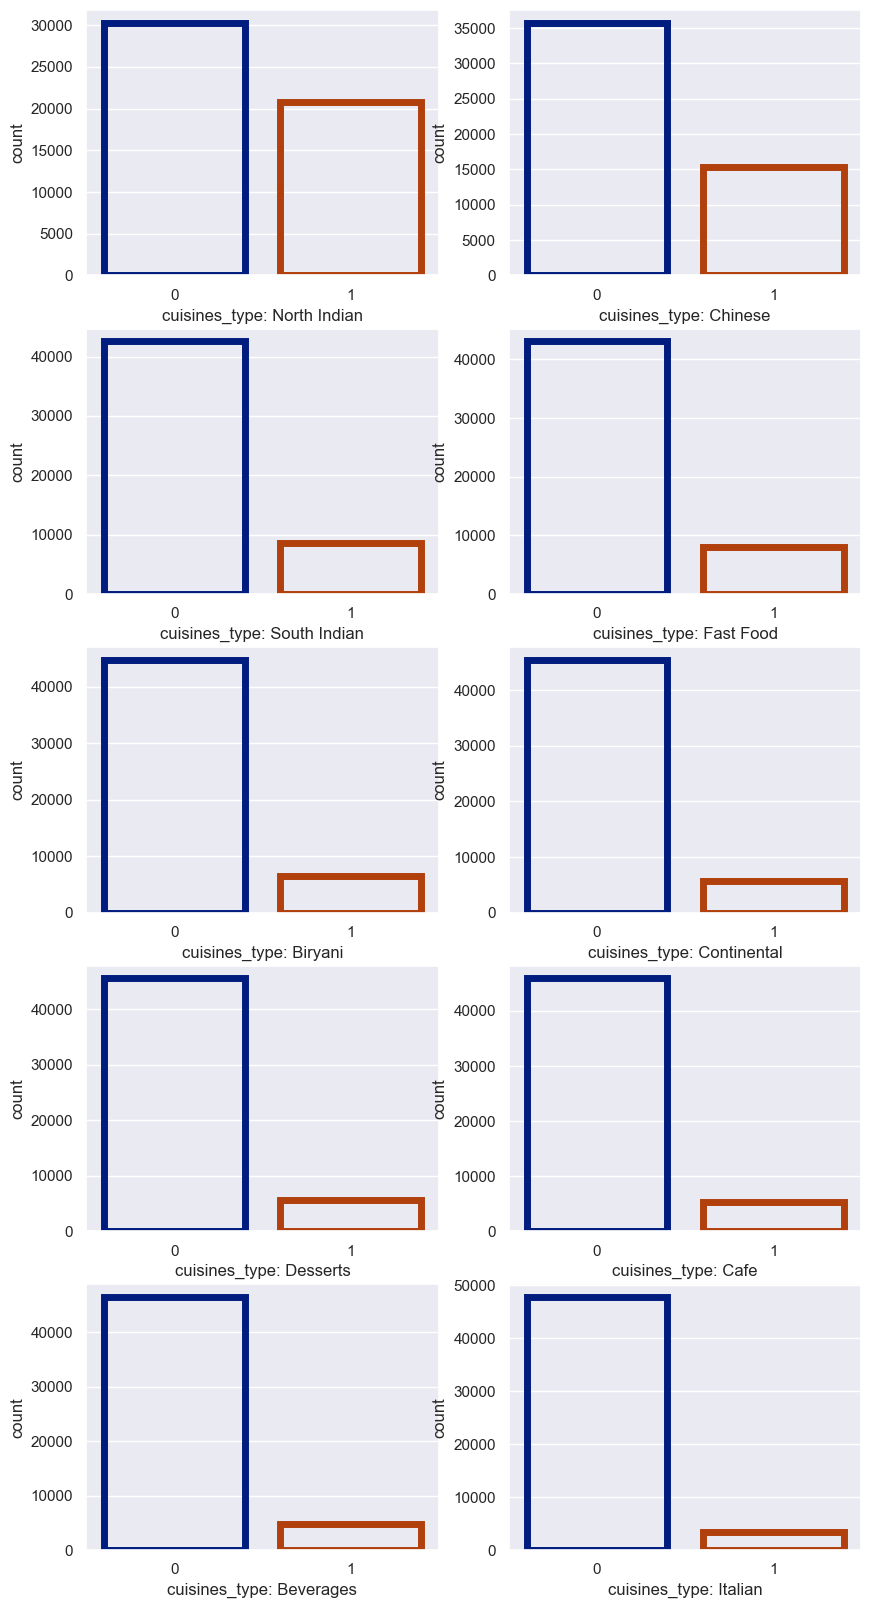

In [68]:
fig, ax = plt.subplots(figsize=(10,20))
for N in range(10) : 
    N+=1
    plt.subplot(5,2,N)
    sns.countplot(x=cuisinesFeaturesList[N-1], data=df,facecolor=(0, 0, 0, 0),linewidth=5,
                  edgecolor=sns.color_palette("dark", 3))

In [69]:
Rest_typeFeaturesList = [c for c in df.columns if 'rest_type ' in c]

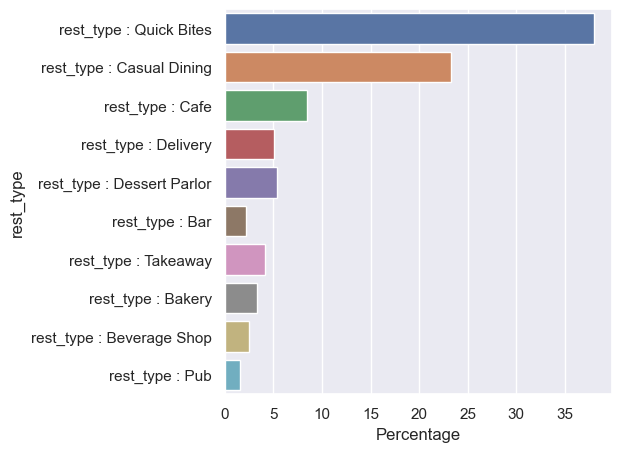

In [70]:
WordExistNumbers = list(df[Rest_typeFeaturesList].sum().values)
WordExistRatios = [np.round(100*i/df.shape[0],2) for i in WordExistNumbers]
WordExistNumbers,WordExistRatios
ThisData = pd.DataFrame([WordExistRatios,Rest_typeFeaturesList],index =['Percentage','rest_type']).T
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x="Percentage", y="rest_type", data=ThisData)

<AxesSubplot:xlabel='rate', ylabel='count'>

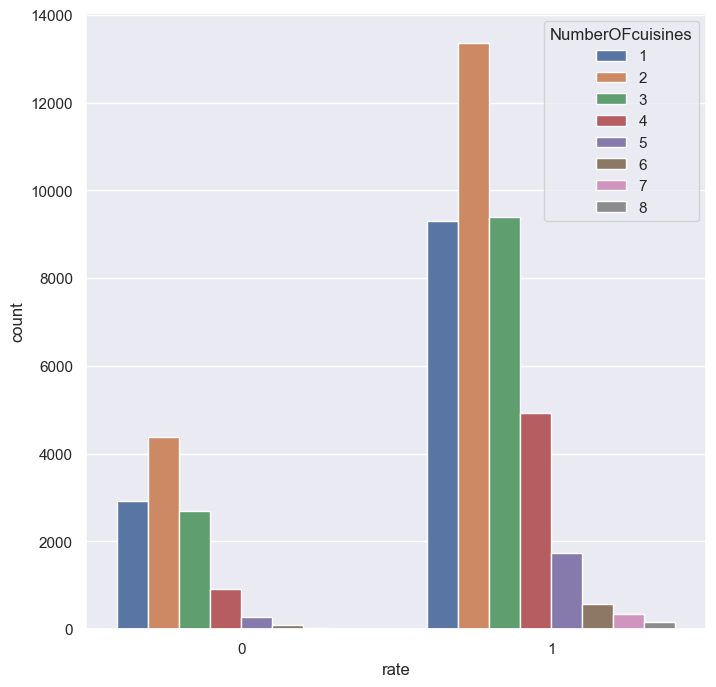

In [71]:
sns.countplot(hue='NumberOFcuisines' , x='rate' , data=df)

<AxesSubplot:xlabel='rate', ylabel='count'>

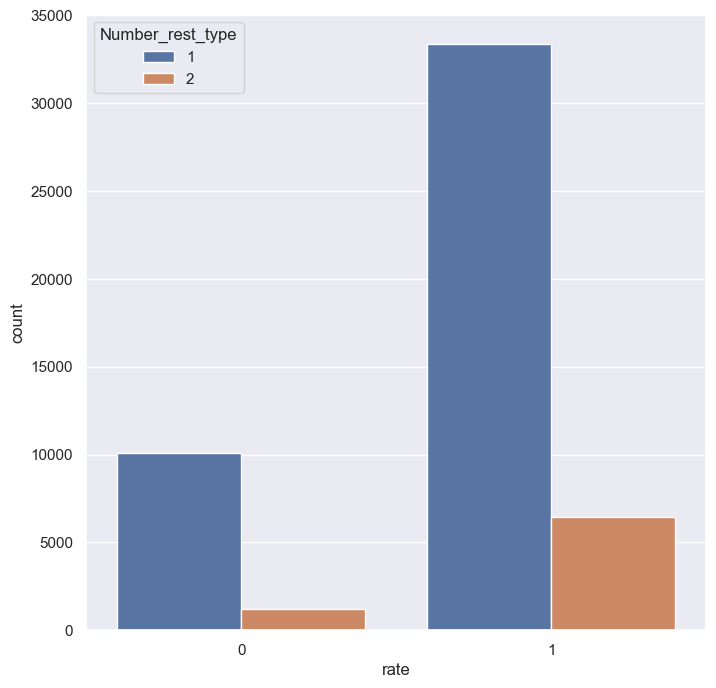

In [72]:
sns.countplot(hue='Number_rest_type' , x='rate' , data=df)

<AxesSubplot:xlabel='rate', ylabel='count'>

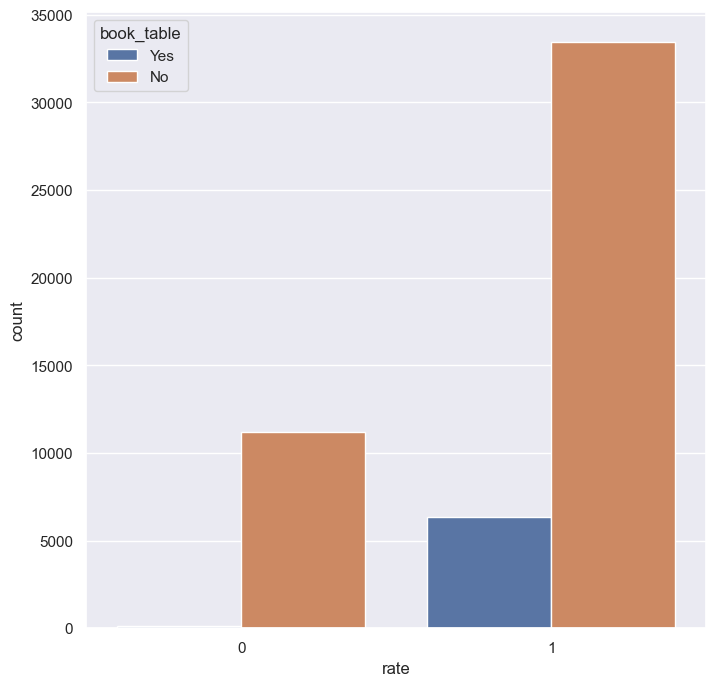

In [73]:
sns.countplot(hue='book_table' , x='rate' , data=df)

<AxesSubplot:xlabel='rate', ylabel='count'>

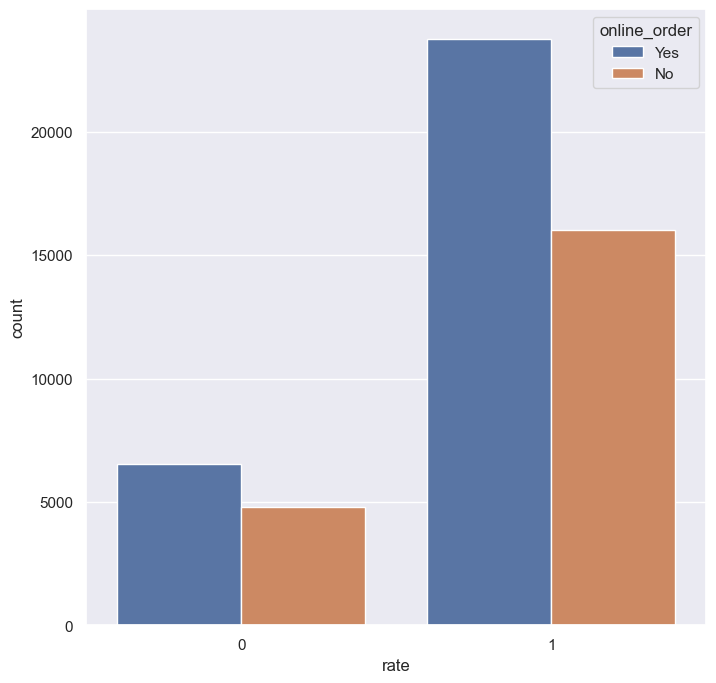

In [74]:
sns.countplot(hue='online_order' , x='rate' , data=df)

In [75]:
!pip install geopy


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="app")

In [77]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [78]:
lat=[]
lon=[]
for location in locations['Name']:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [79]:
locations['lat']=lat
locations['lon']=lon
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()


,Name,count,lat,lon
0,BTM,5071,45.954851,-112.496595
1,others,4668,43.508128,141.627085
2,HSR,2496,18.147500,41.538889
3,Koramangala 5th Block,2481,12.934843,77.618977
4,JP Nagar,2219,12.265594,76.646540


In [80]:
import folium  
from folium.plugins import HeatMap
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map
basemap=generateBaseMap()
HeatMap(Restaurant_locations[['lat','lon','count']],zoom=20,radius=15).add_to(basemap)

In [81]:
basemap

# prepare for modeling

In [82]:
#import library to make label encoder on categorical feature
from sklearn.preprocessing import LabelEncoder
book_tableEnc,listed_citycEnc,listed_typeEnc,online_orderEnc,locationEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

def ApplyEncoder(Encoder,OriginalColumn) : 
    global df
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [83]:
df['book_tableEnc'] = ApplyEncoder(book_tableEnc,'book_table')
df['listed_citycEnc'] = ApplyEncoder(listed_citycEnc,'listed_in(city)')
df['online_orderEnc'] = ApplyEncoder(online_orderEnc,'online_order')
df['locationEnc'] = ApplyEncoder(locationEnc,'location')

In [84]:
df.shape

(51148, 72)

In [103]:
### Feature extraction that effect on rate for modeling 
new = df[['book_tableEnc','online_orderEnc','locationEnc',
       'approx_cost(for two people)',
       'DishLikedCount', 'Number_rest_type','rest_type : Quick Bites', 'rest_type : Casual Dining',
       'rest_type : Cafe', 'rest_type : Delivery',
       'rest_type : Dessert Parlor', 'rest_type : Bar', 'rest_type : Takeaway',
       'rest_type : Bakery', 'rest_type : Beverage Shop', 'rest_type : Pub',
       'rest_type:other',
       'NumberOFcuisines', 'cuisines_type: North Indian',
       'cuisines_type: Chinese', 'cuisines_type: South Indian',
       'cuisines_type: Fast Food', 'cuisines_type: Biryani',
       'cuisines_type: Continental', 'cuisines_type: Desserts',
       'cuisines_type: Cafe', 'cuisines_type: Beverages',
       'cuisines_type: Italian', 'cuisines_type: Bakery',
       'cuisines_type: Street Food', 'cuisines_type: Pizza',
       'cuisines_type: Burger', 'cuisines_type: Seafood',
       'cuisines_type: Ice Cream', 'cuisines_type: Andhra',
       'cuisines_type: Mughlai', 'cuisines_type: Rolls',
       'cuisines_type: American', 'cuisines_type: Kerala',
       'cuisines_type: Asian', 'cuisines_type: Momos',
       'cuisines_type: Finger Food', 'cuisines_type: Juices',
       'cuisines_type: Salad', 'cuisines_type: Arabian',
       'cuisines_type: Kebab', 'cuisines_type: Mithai', 'cuisines_type: Thai',
       'cuisines_type:other','rate'
        ]]

<AxesSubplot:>

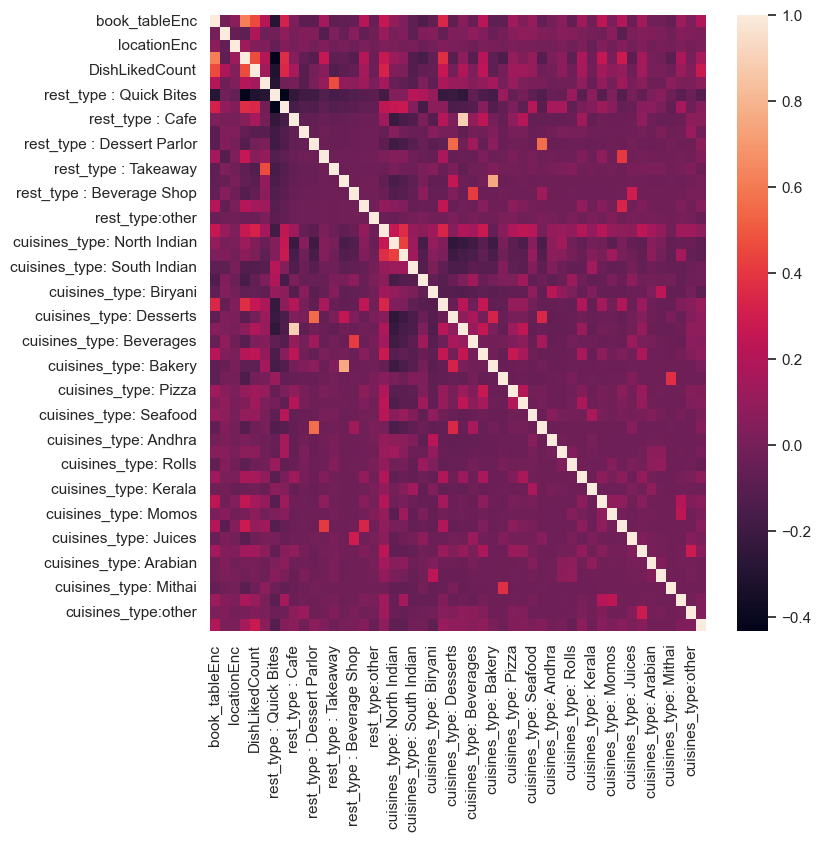

In [104]:
sns.heatmap(new.corr())

In [107]:
### splitting data to x , y
x = new.drop('rate', axis = 1)
y = new['rate']

In [98]:
x.shape,y.shape

((51148, 48), (51148,))

In [108]:
### splitting data to train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1 , random_state = 2 , shuffle = True)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((46033, 49), (5115, 49), (46033,), (5115,))

# Building model & model Selection

In [109]:
### library that had all classification models
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [04:27<00:00,  9.22s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.91,0.91,0.94,4.79
ExtraTreeClassifier,0.94,0.91,0.91,0.94,0.17
DecisionTreeClassifier,0.94,0.91,0.91,0.94,0.37
RandomForestClassifier,0.94,0.90,0.90,0.94,4.16
BaggingClassifier,0.94,0.90,0.90,0.93,1.54
KNeighborsClassifier,0.89,0.83,0.83,0.89,0.67
XGBClassifier,0.85,0.69,0.69,0.83,2.66
NearestCentroid,0.57,0.64,0.64,0.61,0.15
QuadraticDiscriminantAnalysis,0.52,0.63,0.63,0.55,0.20


In [110]:
 from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()
Model.fit(x_train, y_train)
Model.score(x_train, y_train)

0.9741707036256598

In [111]:
from sklearn.metrics import accuracy_score
y_pred = Model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9376344086021505

#  saving model for deployment

In [93]:
import pickle 
pickle_out = open("classifier1.pkl",'wb')
pickle.dump(Model,pickle_out)
pickle_out.close()